In [1]:
# load all the modules necessary
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# read csv file of parkinson's dataset
df=pd.read_csv("parkinsons.csv")
df.head(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [3]:
# get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
# check for null values in each column
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
# check the distribution of target value in the data
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [6]:
# extract features but not the 'name' and 'status' columns
# so drop these two and store the remaining,
# axis 1 is for columns
features = df.drop(['name','status'],axis=1)

# target data will be 'status'
target = df.loc[:,'status']
print(features, target)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [7]:
# scale all the features' data in the range between -1,1
scaler= MinMaxScaler((-1,1))
features_c=scaler.fit_transform(features)
print(features_c)

[[-0.63138346 -0.77481654 -0.89037042 ...  0.17153026 -0.21867743
  -0.0053808 ]
 [-0.6033463  -0.81013911 -0.4433544  ...  0.48267409 -0.05370956
   0.34265204]
 [-0.66992292 -0.88174367 -0.46942324 ...  0.37274182 -0.18236124
   0.19336492]
 ...
 [ 0.00546073 -0.43717403 -0.89854572 ... -0.31484696  0.11793486
  -0.63884033]
 [ 0.28578581  0.20361309 -0.89144127 ... -0.09423055 -0.36355605
  -0.67372646]
 [ 0.46654868 -0.35441175 -0.85610326 ... -0.16981039  0.00734563
  -0.5690805 ]]


In [8]:
# split the dataset into training and testing sets whith 20% data for testing purposes
x_train,x_test,y_train,y_test = train_test_split(features_c, target ,
test_size=0.2,random_state=5)
print(features_c.shape,x_train.shape,x_test.shape)

(195, 22) (156, 22) (39, 22)


In [9]:
# initialize the classifiers and fit the data
model= RandomForestClassifier(random_state=2)
#model= KNeighborsClassifier(n_neighbors = 4)
#model= svm.SVC(kernel='linear')
model.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

In [10]:
# predict the output for x_test
y_pred=model.predict(x_test)

# calculate accuracy, precision, recall, f1 score
print('Accuracy :',accuracy_score(y_test, y_pred))
print('Precision :',precision_score(y_test, y_pred))
print('Recall :',recall_score(y_test, y_pred))
print('F1 :',f1_score(y_test, y_pred))

Accuracy : 0.8974358974358975
Precision : 0.9310344827586207
Recall : 0.9310344827586207
F1 : 0.9310344827586207


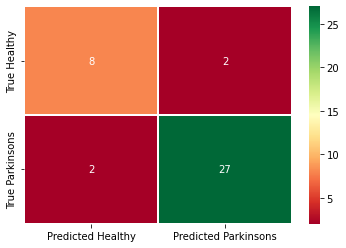

In [11]:
# plot confusion matrix for the predictions using heatmap
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Healthy', 'Predicted Parkinsons'],
    index=['True Healthy', 'True Parkinsons']
)
sn.heatmap(cm, cmap ='RdYlGn', linewidths = 0.30, annot = True)
plt.show()

In [12]:
# input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

# reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

# print the predicted output for input array
print("Parkinson's Disease Detected" if model.predict(in_data_sca) else "No Parkinson's Disease Detected")

148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
Parkinson's Disease Detected
